## Attempt to understand which events cause the central and the lateral increase in TRK_PHI2 (polarization angle distribution) for real data

Looking at the polarization angle ($\varphi$) histograms for 100% polarized events both from real data and from simulations (generated with ixpesim), I noticed the presence of disturbing bumps of events in real data histograms around 0° and $\pm$180°. These bumps are not present in any of the simulations data, and they cause a deviation of the distribution from the expected $\varphi$ distribution, R($\varphi$) $\propto$ cos$^2$($\varphi$).

First of all, I tried to change the zero suppression threshold and the first and second pass moments analysis thresholds in order to see if the bump would have disapperad, or at least become smaller. This very first attempt was unsuccessful. No significant change happened.

Therefore, I tried to figure out whether the events of the bumps belong to a population which is different from the one of the X-ray photons.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.table import Table

In [8]:
# READ ixperecon output file and print the columns corresponding to the first five events.

f = Table.read('/home/lorenzo/ixpeTO/tools/data/xpol_2735_recon.fits', format='fits')
df = f.to_pandas()
# df.head(5)

In [9]:
# PRINT some statistical values
# df.describe()

## 1. Bumps' events selection. $\varphi$ bins.

After looking at the complete $\varphi$ distribution, I selected five ranges of $\varphi$ in order to isolate the three regions with the bumps.
The BLUE plots show the $\varphi$ distribution:
 - 1st histogram: complete (-180° < $\varphi$ < 180°). It is possible to see the bumps.
 - 2nd to 6th histograms: splitted in five ranges
    - plot 0: half bump around -180°
    - plot 2: bump around 0°
    - plot 4: half bump around 180°


Hypothesis: if the events belong to different populations with different energies (x-rays and protons? X-rays and muons?), the total pulse height (PI = pulse invariant) of their track should be significantly different:
 - low energy photons/particles $\rightarrow$ ejected (photo)electron (photoelectric effect or ionization) has low energy $\rightarrow$ few gas molecules ionized, smaller track and less total charge collected;
 - high energy photons/particles $\rightarrow$ ejected (photo)electron has high energy $\rightarrow$ more gas molecules ionized, bigger track and greater total charge collected.
 
Outcome: interesting result. Different population found. Further analysis to understand if the can belong to two hypothetic different populations:
  1. low energy (2-8 keV) X-ray photons;
  2. high energy background (p, $\mu$,...)


First attempt: try to separate the pulse height distribuion according to the $\varphi$-binning (the five above mentioned regions). $\rightarrow$ No clear way to distinguish the populations using $\varphi$ regions.

// 1. Likely low energy (2-8 keV) X-ray photons tracks:
//   - phi range: NO-BUMPS regions
//   - total pulse height range: 0 - 25000 PI
// 2. Likely high energy background (p, $\mu$,...?)
//   - phi range: BUMP regions
//   - total pulse height range: up to ~10

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7bd3327d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa7be4ad410>]], dtype=object)

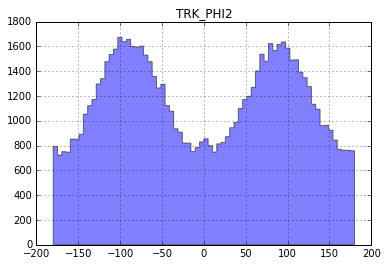

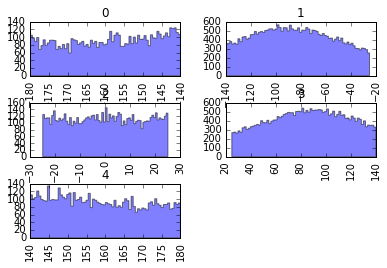

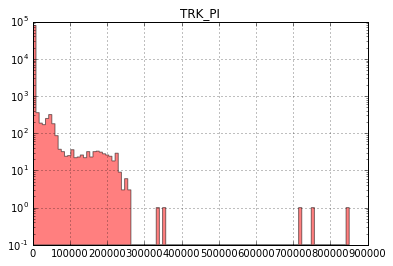

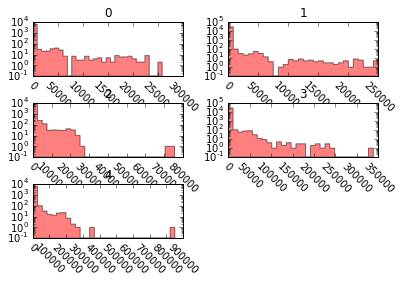

In [37]:
# TEST BIN SU PHI2
phibins = [-180., -140., -25., 25., 140., 180.] #-140, 140
df['phibin'] = pd.cut(df.TRK_PHI2, phibins, labels=False)
df.hist('TRK_PHI2', bins=70, histtype='stepfilled', alpha=0.5)
df.hist('TRK_PHI2', by='phibin', bins=70, histtype='stepfilled', alpha=0.5)
df.hist('TRK_PI', bins=100, log=True, histtype='stepfilled', alpha=0.5, color='r')
df.hist('TRK_PI', by='phibin', bins=30, xrot=-45., log=True, histtype='stepfilled', alpha=0.5, color='r')

## 2. Separation of different populations: pulse invariant (PI) bins to $\varphi$ distribution.

Looking at the complete track pulse height distribution (in pulse invariant, PI), three regions can be identified.

Plotting the $\varphi$ distribution of the three PI populations, the resulting outcome is:
 - tracks with PI $\in$ [0, 20000] $\rightarrow$ polarized X-ray events: R($\varphi$) $\propto$ cos$^2$($\varphi$)
 - tracks with PI $\in$ [20000, 80000] $\rightarrow$ background
 - tracks with PI $\in$ [80000, 900000] $\rightarrow$ background

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7af2d0410>]], dtype=object)

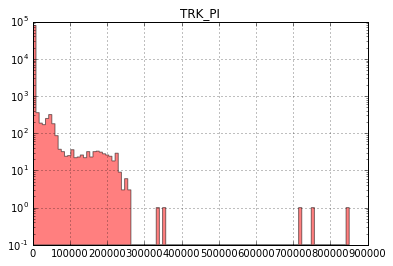

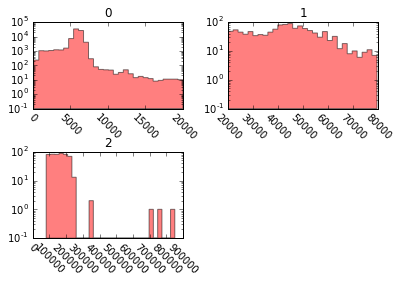

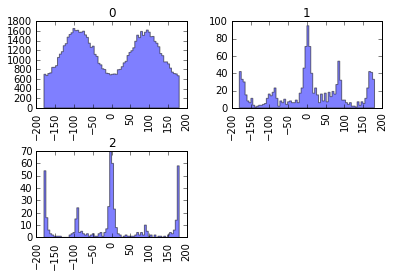

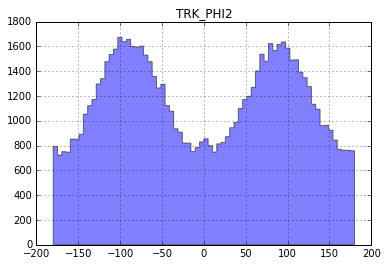

In [80]:
#TEST BIN IN PULSE INVARIANT ---> to PHI distribution

#pibins = [0, 15000, 900000]
pibins = [0, 20000, 80000, 900000]

df['pibin'] = pd.cut(df.TRK_PI, pibins, labels=False)
df.hist('TRK_PI', bins=100, log=True, histtype='stepfilled', alpha=0.5, color='r')
df.hist('TRK_PI', by='pibin', bins=30, xrot=-45., log=True, histtype='stepfilled', alpha=0.5, color='r')
df.hist('TRK_PHI2', grid=True, by='pibin', bins=70, histtype='stepfilled', alpha=0.5)
df.hist('TRK_PHI2', bins=70, histtype='stepfilled', alpha=0.5)
#df.hist('eventID', by='pibin', bins=81)



## 3. Separation of different populations: PI bins to skewness.

The shape of background events' tracks should look more cirular and symmetric. Therefore, I tried to analyse the skewness distribution of the three PI populations identified at the previous point (2).

Expected outcome: skewness peak aroud zero much sharper for background events. Polarised X-rays tracks are more elongated, and therefore the skewness can be greater.

Riesco a chiedere l'RMS della distribuzione???

Result: as expected. N.B.: there seems to be:
 - a significant change (look at second region variations) when the upper edge of the first range is set at 8000 PI;
 - a change (look at second and third region variations) when the upper edge of the first range is set around 30000-50000 PI.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7ae0b8e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa7b00d9710>]], dtype=object)

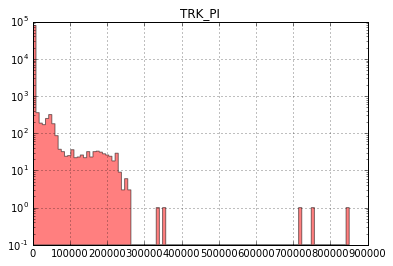

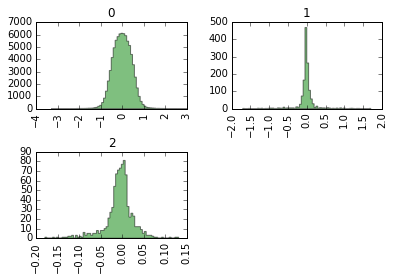

In [103]:
#TEST BIN IN PULSE INVARIANT ---> to SKEWNESS

#pibins = [0, 15000, 900000]
pibins2 = [0, 8000, 50000, 900000]
df['pibin2'] = pd.cut(df.TRK_PI, pibins2, labels=False)

df.hist('TRK_PI', bins=100, log=True, histtype='stepfilled', alpha=0.5, color='r')
df.hist('TRK_SKEW', grid=True, by='pibin2', bins=70, histtype='stepfilled', alpha=0.5, color='g')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9a1bf7f10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff99eeb4a50>]], dtype=object)

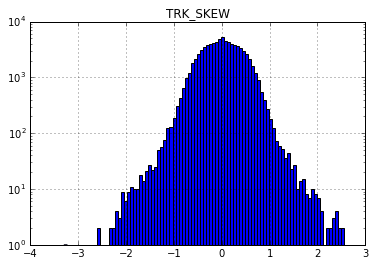

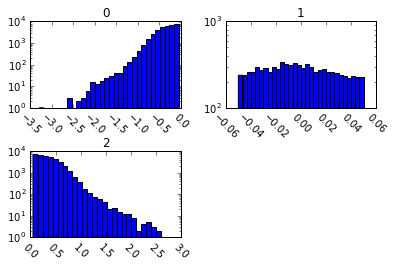

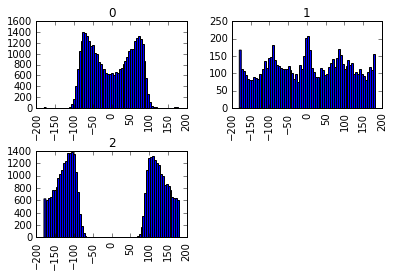

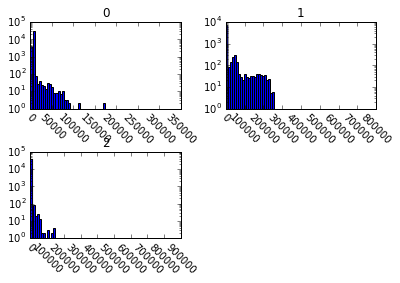

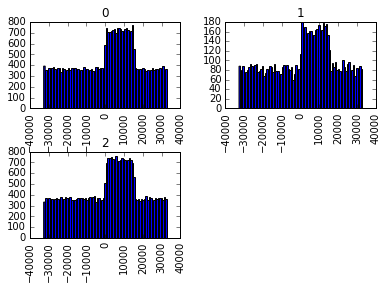

In [15]:
skewbins = [-5.,-0.05, 0.05, 5]
df['skewbin'] = pd.cut(df.TRK_SKEW, skewbins, labels=False)
df.hist('TRK_SKEW', bins=100, log=True)
df.hist('TRK_SKEW', by='skewbin', bins=30, xrot=-45., log=True)
df.hist('TRK_PHI2', grid=True, by='skewbin', bins=70)
df.hist('TRK_PI', grid=True, by='skewbin', bins=70, xrot=-45., log=True)
df.hist('eventID', by='skewbin', bins=81)

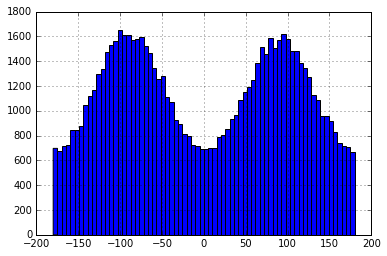

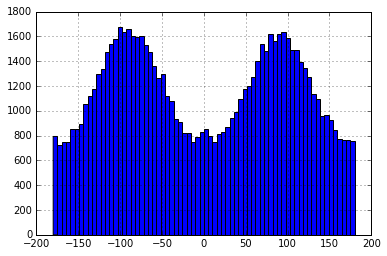

In [16]:
#FINAL RESULTS: MERGE TRK_SKEW AND TRK_PI CUTS
index1 = np.where((df['TRK_SKEW']<-0.05)&(df['TRK_SKEW']>0.05))[0]
index2 = np.where(df['TRK_PI']<15000)[0]
ind_tot = np.union1d(index1, index2)
df['TRK_PHI2'][ind_tot].hist(bins=70)
plt.figure()
df['TRK_PHI2'].hist(bins=70)